In [68]:
#new "plots"
import argparse
import pysam
from pathlib import Path
import pandas as pd
import numpy as np

In [71]:
import numpy as np
from scipy.stats import chi2_contingency

def chi_table(tbl):
    chi = []
    for index, row in tbl.iterrows():
        contingency_table = np.array([[row['total edited reads'] - row['edited reads with indels '], row['edited reads with indels ']],
                                  [row['total wt reads'] - row['wt reads with indels'], row['wt reads with indels']]])

        if  (row['wt reads with indels'] == 0 and  row['edited reads with indels '] == 0) or (row['total edited reads'] - row['edited reads with indels '] == 0 and row['edited reads with indels '] == 0) or (row['total wt reads'] - row['wt reads with indels'] == 0 and row['wt reads with indels'] == 0):
            chi.append(None)
        else:
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            chi.append(p_value)
    
    return chi

In [72]:
alt7 = 'alt7_lifted.tsv'
rex4 = 'rex4_lifted.tsv'
rexc = 'rexc_lifted.tsv'
altc = 'altc_lifted_formatted_2.tsv'
print('ALTC_0casoffinder_taylor_consensus_comparison_hg38.csv')

#contains the locations of all the guides (lifted)
altc = Path('small_bams_again') / 'beds' / 'altc_lifted.bed'
alt7 = Path('small_bams_again') / 'beds' / 'alt7_lifted.bed'
rex4 = Path('small_bams_again') / 'beds' / 'rex4_lifted.bed'
rexc = Path('small_bams_again') / 'beds' / 'rexc_lifted.bed'

all_tsvs = {'ALTC':pd.read_csv(alt7, sep='\t',  names=['name','chrom','start','end','na','na2','REGION'])[1:],  
    'ALT7':pd.read_csv(alt7, sep='\t',  names=['name','chrom','start','end','na','na2','REGION'])[1:],
                'REX4':pd.read_csv(rex4, sep='\t',  names=['name','chrom','start','end','na','na2','REGION'])[1:],
                'REXC':pd.read_csv(rexc, sep='\t',  names=['name','chrom','start','end','na','na2','REGION'])[1:]}


edited_dfs = {'ALTC': [None, None],'ALT7': [None, None],
      'REXC': [None, None],
      'REX4':[None, None]}

comp_dfs = {'ALTC': [None, None], 
            'ALT7': [None, None],
      'REXC': [None, None],
      'REX4':[None, None]}

control_dfs = {'ALTC': [None, None],
               'ALT7': None,
      'REXC': None,
      'REX4': None}


edited_dfs_cof = {'ALTC': [None, None],'ALT7': [None, None],
      'REXC': [None, None],
      'REX4':[None, None]}

comp_dfs_cof = {'ALTC': [None, None], 
            'ALT7': [None, None],
      'REXC': [None, None],
      'REX4':[None, None]}

control_dfs_cof = {'ALTC': [None, None],
               'ALT7': None,
      'REXC': None,
      'REX4': None}



for condition in all_tsvs:
    for replicate in  np.arange(0,2):
        file_path = f"{condition}casoffinder_taylor_consensus_indel_rates_hg38{replicate}.csv"  # Construct file name
        edited_dfs_cof[condition][replicate] = pd.read_csv(file_path)

for condition in all_tsvs:
    file_path = f"{condition}casoffinder_taylor_consensus_indel_rates_control_hg38.csv"  # Using f-string for readability
    control_dfs_cof[condition] = pd.read_csv(file_path)

for condition in all_tsvs:
    for replicate in np.arange(0,2):
        file_path = f"{condition}{replicate}casoffinder_taylor_consensus_comparison_hg38.csv"  # Using f-string for readability
        print(file_path)
        comp_dfs_cof[condition][replicate] = pd.read_csv(file_path)

for condition in all_tsvs:
    for replicate in  np.arange(0,2):
        file_path = f"{condition}taylor_consensus_indel_rates_hg38{replicate}.csv"  # Construct file name
        edited_dfs[condition][replicate] = pd.read_csv(file_path)

for condition in all_tsvs:
    file_path = f"{condition}taylor_consensus_indel_rates_control_hg38.csv"  # Using f-string for readability
    control_dfs[condition] = pd.read_csv(file_path)


for condition in all_tsvs:
    for replicate in np.arange(0,2):
        file_path = f"{condition}{replicate}_taylor_consensus_comparison_hg38.csv"  # Using f-string for readability
        print(file_path)
        comp_dfs[condition][replicate] = pd.read_csv(file_path)


print(comp_dfs.keys())
print(comp_dfs_cof.keys())

ALTC_0casoffinder_taylor_consensus_comparison_hg38.csv
ALTC0casoffinder_taylor_consensus_comparison_hg38.csv
ALTC1casoffinder_taylor_consensus_comparison_hg38.csv
ALT70casoffinder_taylor_consensus_comparison_hg38.csv
ALT71casoffinder_taylor_consensus_comparison_hg38.csv
REX40casoffinder_taylor_consensus_comparison_hg38.csv
REX41casoffinder_taylor_consensus_comparison_hg38.csv
REXC0casoffinder_taylor_consensus_comparison_hg38.csv
REXC1casoffinder_taylor_consensus_comparison_hg38.csv
ALTC0_taylor_consensus_comparison_hg38.csv
ALTC1_taylor_consensus_comparison_hg38.csv
ALT70_taylor_consensus_comparison_hg38.csv
ALT71_taylor_consensus_comparison_hg38.csv
REX40_taylor_consensus_comparison_hg38.csv
REX41_taylor_consensus_comparison_hg38.csv
REXC0_taylor_consensus_comparison_hg38.csv
REXC1_taylor_consensus_comparison_hg38.csv
dict_keys(['ALTC', 'ALT7', 'REXC', 'REX4'])
dict_keys(['ALTC', 'ALT7', 'REXC', 'REX4'])


In [73]:
for condition in comp_dfs:
    for replicate in np.arange(0,1):
        print(comp_dfs[condition][replicate]['chrom'].unique())

for condition in comp_dfs_cof:
    for replicate in np.arange(0,1):
        print(comp_dfs_cof[condition][replicate]['chrom'].unique())

['chr3' 'chr4' 'chrX' 'chr1' 'chr7' 'chr12' 'chr17' 'chr13' 'chr15' 'chr5'
 'chr8' 'chr9' 'chr20' 'chr16' 'chr10' 'chr2' 'chr14' 'chr21' 'chr18'
 'chr11' 'chr6' 'chr19' 'chr22']
['chr8' 'chr1' 'chr7' 'chr6' 'chr18' 'chr14' 'chr16' 'chr9' 'chr5' 'chr10'
 'chr11' 'chr2' 'chr12' 'chr3' 'chr17' 'chrX' 'chr15' 'chr4' 'chr22'
 'chr20' 'chr13' 'chr21' 'chr19']
['chr1' 'chr15' 'chr16' 'chr5' 'chr19' 'chr3' 'chr14' 'chr22' 'chr9'
 'chr10' 'chr18' 'chr4' 'chr8' 'chr11' 'chr2' 'chr21' 'chr6' 'chrX'
 'chr20' 'chr12' 'chr17' 'chr7' 'chr13']
['chr11' 'chr21' 'chr5' 'chr20' 'chr1' 'chr8' 'chr7' 'chr6' 'chr9' 'chr16'
 'chr18' 'chr19' 'chr4' 'chr3' 'chrX' 'chr17' 'chr15' 'chr10' 'chr2'
 'chr12' 'chr22' 'chr14' 'chr13']
['chr8' 'chr15' 'chr5' 'chr20' 'chr1' 'chr22' 'chr7' 'chr2' 'chr12' 'chr4'
 'chr17' 'chr16' 'chr9' 'chrX' 'chr14' 'chr6' 'chrY' 'chr11' 'chr10'
 'chr13' 'chr3']
['chr8' 'chr15' 'chr5' 'chr20' 'chr1' 'chr22' 'chr7' 'chr2' 'chr12'
 'chr21' 'chr4' 'chr17' 'chr16' 'chr9' 'chrX' 'chr14' 'chr6

In [75]:
from statsmodels.stats.multitest import multipletests

#combine the two tables
for condition in all_tsvs:
    for replicate in range(2):  # Iterate through two replicates (0 and 1)
        comp_dfs_cof[condition][replicate]['category'] = 'Cas-OFFinder nominated'
        comp_dfs[condition][replicate]['category'] = 'CHANGE-seq nominated'
        comp_dfs[condition][replicate]=pd.concat([comp_dfs_cof[condition][replicate],comp_dfs[condition][replicate]])

for condition in all_tsvs:
    for replicate in range(2):  # Iterate through two replicates (0 and 1)
        # Get the raw p-values for the current replicate and condition
        raw_p_values = comp_dfs[condition][replicate]['indel p-value']
        
        # Apply Benjamini-Hochberg correction (FDR control)
        reject, adjusted_p_values, _, _ = multipletests(raw_p_values, alpha=0.05, method='fdr_bh')
        
        # Add the adjusted p-values back into the DataFrame
        comp_dfs[condition][replicate]['adjusted indel p-value'] = adjusted_p_values

        # Optionally, you could also keep the "reject" array to know which tests are significant
        # comp_dfs[condition][replicate]['reject null'] = reject


for condition in ['ALT7', 'ALTC', 'REXC', 'REX4']:
    for replicate in [0, 1]:
        df = comp_dfs[condition][replicate]

        agg_dict = {}
        for col in df.columns:
            if col == 'start':
                continue  # grouping column
            elif col == 'category':
                # Join all category values (as strings)
                agg_dict[col] = lambda x: ','.join(x.astype(str))
            else:
                # Take the first value for any other column
                agg_dict[col] = 'first'

        comp_dfs[condition][replicate] = df.groupby('start').agg(agg_dict).reset_index()




In [77]:
comp_dfs[condition][replicate]['category']

# Define the chrom_order list
chrom_order = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 
               'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 
               'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']

# Loop through each condition and replicate
for condition in all_tsvs:
    for replicate in np.arange(0, 2):
        # Read the DataFrame (assuming file_path is defined earlier)
        
        # Filter the DataFrame to include only rows with 'chrom' values in chrom_order
        filtered_df = comp_dfs[condition][replicate][comp_dfs[condition][replicate]['chrom'].isin(chrom_order)]
        
        # Sort the DataFrame by 'chrom' according to the chrom_order list
        filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)
        sorted_df = filtered_df.sort_values(by=['chrom', 'start'])
        
        # Update the DataFrame with the filtered and sorted data
        comp_dfs[condition][replicate] = sorted_df

        # If you want to display the sorted DataFrame
        display(sorted_df)


/var/folders/cv/22ql5pqj69qg5pfn9vhrc6j40000gn/T/ipykernel_45065/1282005281.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,category,chi pvalue,adjusted indel p-value
23,10798847.0,33,REGION_33.bam,chr1,10798870.0,0.0,0.0,436.0,635.0,0,0,1.0,0,Cas-OFFinder nominated,NaN,1.0
41,15276185.0,34,REGION_34.bam,chr1,15276208.0,0.0,0.0,373.0,613.0,0,0,1.0,0,Cas-OFFinder nominated,NaN,1.0
52,17901370.0,159,REGION_159.bam,chr1,17901393.0,0.0,0.0,302.0,528.0,0,0,1.0,0,CHANGE-seq nominated,NaN,1.0
71,22688376.0,310,REGION_310.bam,chr1,22688399.0,0.0,0.0,397.0,548.0,0,0,1.0,0,CHANGE-seq nominated,NaN,1.0
84,25661879.0,272,REGION_272.bam,chr1,25661902.0,0.0,0.0,330.0,642.0,0,0,1.0,0,CHANGE-seq nominated,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,133821639.0,116,REGION_116.bam,chrX,133821662.0,0.0,0.0,305.0,435.0,0,0,1.0,0,CHANGE-seq nominated,NaN,1.0
400,134374281.0,293,REGION_293.bam,chrX,134374304.0,0.0,0.0,296.0,463.0,0,0,1.0,0,CHANGE-seq nominated,NaN,1.0
404,137222940.0,107,REGION_107.bam,chrX,137222963.0,0.0,0.0,286.0,422.0,0,0,1.0,0,CHANGE-seq nominated,NaN,1.0
408,139704822.0,237,REGION_237.bam,chrX,139704845.0,0.0,0.0,291.0,410.0,0,0,1.0,0,CHANGE-seq nominated,NaN,1.0


/var/folders/cv/22ql5pqj69qg5pfn9vhrc6j40000gn/T/ipykernel_45065/1282005281.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,category,chi pvalue,adjusted indel p-value
23,10798847.0,33,REGION_33.bam,chr1,10798870.0,0.002188,0.0,457.0,635.0,1,0,0.418498,1,Cas-OFFinder nominated,NaN,1.0
41,15276185.0,34,REGION_34.bam,chr1,15276208.0,0.000000,0.0,437.0,613.0,0,0,1.000000,1,Cas-OFFinder nominated,NaN,1.0
52,17901370.0,159,REGION_159.bam,chr1,17901393.0,0.000000,0.0,351.0,528.0,0,0,1.000000,1,CHANGE-seq nominated,NaN,1.0
71,22688376.0,310,REGION_310.bam,chr1,22688399.0,0.000000,0.0,398.0,548.0,0,0,1.000000,1,CHANGE-seq nominated,NaN,1.0
84,25661879.0,272,REGION_272.bam,chr1,25661902.0,0.000000,0.0,453.0,642.0,0,0,1.000000,1,CHANGE-seq nominated,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,133821639.0,116,REGION_116.bam,chrX,133821662.0,0.000000,0.0,302.0,435.0,0,0,1.000000,1,CHANGE-seq nominated,NaN,1.0
400,134374281.0,293,REGION_293.bam,chrX,134374304.0,0.000000,0.0,341.0,463.0,0,0,1.000000,1,CHANGE-seq nominated,NaN,1.0
404,137222940.0,107,REGION_107.bam,chrX,137222963.0,0.000000,0.0,290.0,422.0,0,0,1.000000,1,CHANGE-seq nominated,NaN,1.0
408,139704822.0,237,REGION_237.bam,chrX,139704845.0,0.000000,0.0,343.0,410.0,0,0,1.000000,1,CHANGE-seq nominated,NaN,1.0


/var/folders/cv/22ql5pqj69qg5pfn9vhrc6j40000gn/T/ipykernel_45065/1282005281.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,category,chi pvalue,adjusted indel p-value
15,994014.0,757,REGION_757.bam,chr1,994037.0,0.000000,0.001815,517.0,551.0,0,1,1.000000,0,"Cas-OFFinder nominated,CHANGE-seq nominated",1.000000,1.0
17,1022367.0,2026,REGION_2026.bam,chr1,1022390.0,0.000000,0.000000,376.0,499.0,0,0,1.000000,0,CHANGE-seq nominated,NaN,1.0
21,1218324.0,1153,REGION_1153.bam,chr1,1218347.0,0.000000,0.000000,404.0,542.0,0,0,1.000000,0,CHANGE-seq nominated,NaN,1.0
28,1476918.0,1023,REGION_1023.bam,chr1,1476940.0,0.000000,0.000000,479.0,557.0,0,0,1.000000,0,CHANGE-seq nominated,NaN,1.0
56,2301518.0,1785,REGION_1785.bam,chr1,2301541.0,0.000000,0.001692,408.0,591.0,0,1,1.000000,0,CHANGE-seq nominated,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,154022261.0,1688,REGION_1688.bam,chrX,154022283.0,0.002079,0.000000,481.0,510.0,1,0,0.485368,0,CHANGE-seq nominated,0.976633,1.0
3342,154882248.0,2272,REGION_2272.bam,chrX,154882271.0,0.000000,0.000000,145.0,177.0,0,0,1.000000,0,Cas-OFFinder nominated,NaN,1.0
3344,155306644.0,2273,REGION_2273.bam,chrX,155306667.0,0.000000,0.002088,398.0,479.0,0,1,1.000000,0,"Cas-OFFinder nominated,CHANGE-seq nominated",1.000000,1.0
3345,155377985.0,2275,REGION_2275.bam,chrX,155378008.0,0.000000,0.000000,130.0,141.0,0,0,1.000000,0,Cas-OFFinder nominated,NaN,1.0


/var/folders/cv/22ql5pqj69qg5pfn9vhrc6j40000gn/T/ipykernel_45065/1282005281.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,category,chi pvalue,adjusted indel p-value
15,994014.0,757,REGION_757.bam,chr1,994037.0,0.012658,0.001815,474.0,551.0,6,1,0.053548,1,"Cas-OFFinder nominated,CHANGE-seq nominated",0.085188,1.0
17,1022367.0,2026,REGION_2026.bam,chr1,1022390.0,0.000000,0.000000,408.0,499.0,0,0,1.000000,1,CHANGE-seq nominated,NaN,1.0
21,1218324.0,1153,REGION_1153.bam,chr1,1218347.0,0.000000,0.000000,319.0,542.0,0,0,1.000000,1,CHANGE-seq nominated,NaN,1.0
28,1476918.0,1023,REGION_1023.bam,chr1,1476940.0,0.000000,0.000000,419.0,557.0,0,0,1.000000,1,CHANGE-seq nominated,NaN,1.0
56,2301518.0,1785,REGION_1785.bam,chr1,2301541.0,0.000000,0.001692,408.0,591.0,0,1,1.000000,1,CHANGE-seq nominated,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,154022261.0,1688,REGION_1688.bam,chrX,154022283.0,0.000000,0.000000,347.0,510.0,0,0,1.000000,1,CHANGE-seq nominated,NaN,1.0
3342,154882248.0,2272,REGION_2272.bam,chrX,154882271.0,0.000000,0.000000,115.0,177.0,0,0,1.000000,1,Cas-OFFinder nominated,NaN,1.0
3344,155306644.0,2273,REGION_2273.bam,chrX,155306667.0,0.002551,0.002088,392.0,479.0,1,1,1.000000,1,"Cas-OFFinder nominated,CHANGE-seq nominated",1.000000,1.0
3345,155377985.0,2275,REGION_2275.bam,chrX,155378008.0,0.000000,0.000000,113.0,141.0,0,0,1.000000,1,Cas-OFFinder nominated,NaN,1.0


/var/folders/cv/22ql5pqj69qg5pfn9vhrc6j40000gn/T/ipykernel_45065/1282005281.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,category,chi pvalue,adjusted indel p-value
6,2405292.0,128,REGION_128.bam,chr1,2405315.0,0.0,0.000000,416.0,540.0,0,0,1.0,0,CHANGE-seq nominated,NaN,1.0
8,3037317.0,95,REGION_95.bam,chr1,3037340.0,0.0,0.000000,341.0,501.0,0,0,1.0,0,CHANGE-seq nominated,NaN,1.0
11,3538825.0,39,REGION_39.bam,chr1,3538848.0,0.0,0.000000,293.0,464.0,0,0,1.0,0,CHANGE-seq nominated,NaN,1.0
18,6477585.0,17,REGION_17.bam,chr1,6477608.0,0.0,0.000000,480.0,563.0,0,0,1.0,0,Cas-OFFinder nominated,NaN,1.0
24,8527950.0,63,REGION_63.bam,chr1,8527974.0,0.0,0.000000,406.0,595.0,0,0,1.0,0,CHANGE-seq nominated,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,89872818.0,56,REGION_56.bam,chrX,89872841.0,0.0,0.000000,405.0,447.0,0,0,1.0,0,Cas-OFFinder nominated,NaN,1.0
179,104296778.0,111,REGION_111.bam,chrX,104296801.0,0.0,0.001965,436.0,509.0,0,1,1.0,0,CHANGE-seq nominated,1.0,1.0
185,111221006.0,57,REGION_57.bam,chrX,111221029.0,0.0,0.000000,354.0,439.0,0,0,1.0,0,Cas-OFFinder nominated,NaN,1.0
186,111460469.0,112,REGION_112.bam,chrX,111460492.0,0.0,0.000000,405.0,480.0,0,0,1.0,0,CHANGE-seq nominated,NaN,1.0


/var/folders/cv/22ql5pqj69qg5pfn9vhrc6j40000gn/T/ipykernel_45065/1282005281.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,category,chi pvalue,adjusted indel p-value
6,2405292.0,128,REGION_128.bam,chr1,2405315.0,0.000000,0.000000,519.0,540.0,0,0,1.0,1,CHANGE-seq nominated,NaN,1.0
8,3037317.0,95,REGION_95.bam,chr1,3037340.0,0.000000,0.000000,430.0,501.0,0,0,1.0,1,CHANGE-seq nominated,NaN,1.0
11,3538825.0,39,REGION_39.bam,chr1,3538848.0,0.000000,0.000000,420.0,464.0,0,0,1.0,1,CHANGE-seq nominated,NaN,1.0
18,6477585.0,17,REGION_17.bam,chr1,6477608.0,0.000000,0.000000,473.0,563.0,0,0,1.0,1,Cas-OFFinder nominated,NaN,1.0
24,8527950.0,63,REGION_63.bam,chr1,8527974.0,0.000000,0.000000,428.0,595.0,0,0,1.0,1,CHANGE-seq nominated,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,89872818.0,56,REGION_56.bam,chrX,89872841.0,0.000000,0.000000,446.0,447.0,0,0,1.0,1,Cas-OFFinder nominated,NaN,1.0
179,104296778.0,111,REGION_111.bam,chrX,104296801.0,0.003906,0.001965,512.0,509.0,2,1,1.0,1,CHANGE-seq nominated,1.0,1.0
185,111221006.0,57,REGION_57.bam,chrX,111221029.0,0.000000,0.000000,429.0,439.0,0,0,1.0,1,Cas-OFFinder nominated,NaN,1.0
186,111460469.0,112,REGION_112.bam,chrX,111460492.0,0.002037,0.000000,491.0,480.0,1,0,1.0,1,CHANGE-seq nominated,1.0,1.0


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,category,chi pvalue,adjusted indel p-value
65,1021277.0,1012,REGION_1012.bam,chr1,1021300.0,0.001558,0.000000,642.0,536.0,1,0,1.000000,0,CHANGE-seq nominated,1.000000,1.0
68,1045248.0,1013,REGION_1013.bam,chr1,1045271.0,0.001664,0.000000,601.0,566.0,1,0,1.000000,0,CHANGE-seq nominated,1.000000,1.0
71,1067711.0,48,REGION_48.bam,chr1,1067734.0,0.003891,0.005906,514.0,508.0,2,3,0.685063,0,"Cas-OFFinder nominated,CHANGE-seq nominated",0.989500,1.0
74,1124435.0,426,REGION_426.bam,chr1,1124458.0,0.000000,0.000000,567.0,608.0,0,0,1.000000,0,CHANGE-seq nominated,NaN,1.0
78,1185685.0,2578,REGION_2578.bam,chr1,1185708.0,0.003367,0.006088,594.0,657.0,2,4,0.689133,0,CHANGE-seq nominated,0.774923,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,152094438.0,238,REGION_238.bam,chrX,152094461.0,0.002551,0.000000,392.0,458.0,1,0,0.461176,0,CHANGE-seq nominated,0.937885,1.0
2515,153470571.0,217,REGION_217.bam,chrX,153470594.0,0.000000,0.002387,411.0,419.0,0,1,1.000000,0,"Cas-OFFinder nominated,CHANGE-seq nominated",1.000000,1.0
2517,153737891.0,76,REGION_76.bam,chrX,153737914.0,0.000000,0.000000,456.0,486.0,0,0,1.000000,0,CHANGE-seq nominated,NaN,1.0
2519,154032102.0,1567,REGION_1567.bam,chrX,154032125.0,0.001828,0.005405,547.0,555.0,1,3,0.624358,0,CHANGE-seq nominated,0.626700,1.0


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,category,chi pvalue,adjusted indel p-value
65,1021277.0,1012,REGION_1012.bam,chr1,1021300.0,0.001799,0.000000,556.0,536.0,1,0,1.000000,1,CHANGE-seq nominated,1.000000,1.0
68,1045248.0,1013,REGION_1013.bam,chr1,1045271.0,0.000000,0.000000,518.0,566.0,0,0,1.000000,1,CHANGE-seq nominated,NaN,1.0
71,1067711.0,48,REGION_48.bam,chr1,1067734.0,0.000000,0.005906,499.0,508.0,0,3,0.249314,1,"Cas-OFFinder nominated,CHANGE-seq nominated",0.253884,1.0
74,1124435.0,426,REGION_426.bam,chr1,1124458.0,0.000000,0.000000,553.0,608.0,0,0,1.000000,1,CHANGE-seq nominated,NaN,1.0
78,1185685.0,2578,REGION_2578.bam,chr1,1185708.0,0.001751,0.006088,571.0,657.0,1,4,0.380116,1,CHANGE-seq nominated,0.458599,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,152094438.0,238,REGION_238.bam,chrX,152094461.0,0.004348,0.000000,460.0,458.0,2,0,0.499457,1,CHANGE-seq nominated,0.480937,1.0
2515,153470571.0,217,REGION_217.bam,chrX,153470594.0,0.000000,0.002387,436.0,419.0,0,1,0.490058,1,"Cas-OFFinder nominated,CHANGE-seq nominated",0.984124,1.0
2517,153737891.0,76,REGION_76.bam,chrX,153737914.0,0.000000,0.000000,411.0,486.0,0,0,1.000000,1,CHANGE-seq nominated,NaN,1.0
2519,154032102.0,1567,REGION_1567.bam,chrX,154032125.0,0.008114,0.005405,493.0,555.0,4,3,0.712512,1,CHANGE-seq nominated,0.874989,1.0


{'CHANGE-seq nominated': '#1b9e77', 'Cas-OFFinder nominated': '#d95f02', 'Cas-OFFinder nominated,CHANGE-seq nominated': '#7570b3'}
{'chr1': 248548530.0, 'chr2': 477871878.0, 'chr3': 675503657.0, 'chr4': 858939554.0, 'chr5': 1031632241.0, 'chr6': 1197716518.0, 'chr7': 1354599582.0, 'chr8': 1493240918.0, 'chr9': 1629764195.0, 'chr10': 1756539603.0, 'chr11': 1880204531.0, 'chr12': 2009888257.0, 'chr13': 2120894633.0, 'chr14': 2219508315.0, 'chr15': 2319137009.0, 'chr16': 2394599840.0, 'chr17': 2467197317.0, 'chr18': 2510113862.0, 'chr19': 2558603137.0, 'chr20': 2606499608.0, 'chr21': 2647549269.0, 'chr22': 2685320355.0, 'chrX': 2838522066.0}


,chrom,category,start,p-value,%edited difference,offset_start
23,chr1,Cas-OFFinder nominated,10798847.0,1.0,0.0,2.593474e+08
41,chr1,Cas-OFFinder nominated,15276185.0,1.0,0.0,2.638247e+08
52,chr1,CHANGE-seq nominated,17901370.0,1.0,0.0,2.664499e+08
71,chr1,CHANGE-seq nominated,22688376.0,1.0,0.0,2.712369e+08
84,chr1,CHANGE-seq nominated,25661879.0,1.0,0.0,2.742104e+08
...,...,...,...,...,...,...
398,chrX,CHANGE-seq nominated,133821639.0,1.0,0.0,2.972344e+09
400,chrX,CHANGE-seq nominated,134374281.0,1.0,0.0,2.972896e+09
404,chrX,CHANGE-seq nominated,137222940.0,1.0,0.0,2.975745e+09
408,chrX,CHANGE-seq nominated,139704822.0,1.0,0.0,2.978227e+09


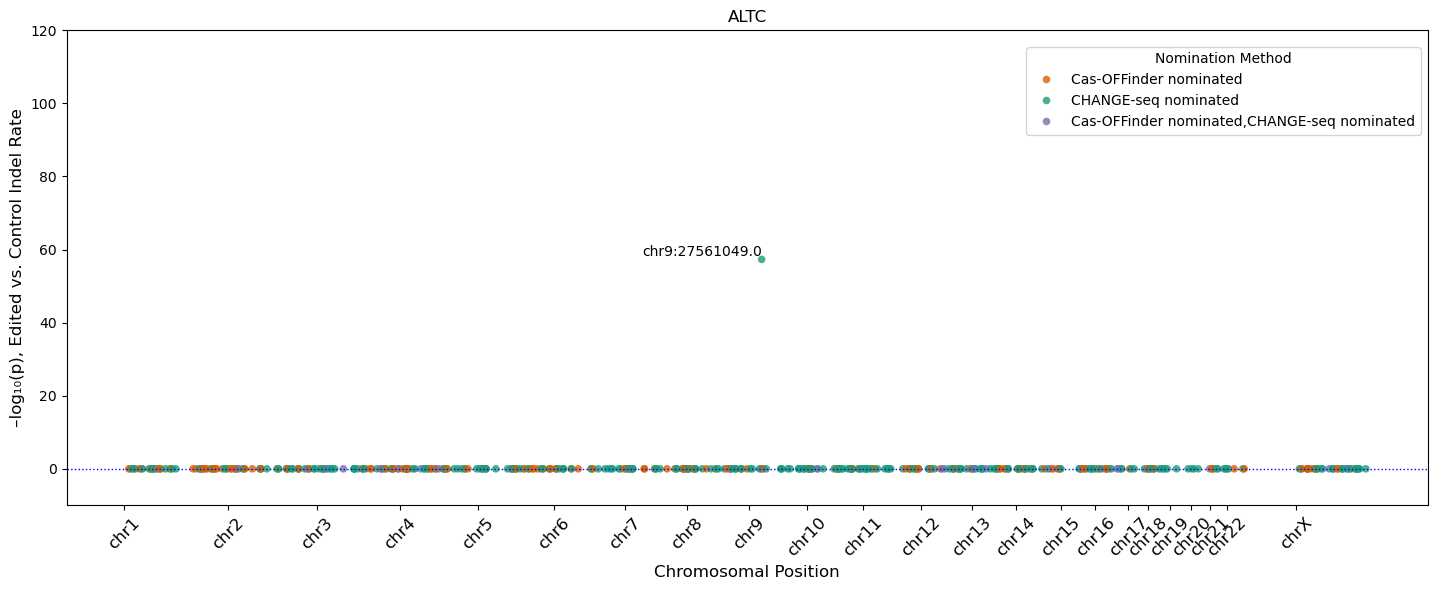

{'chr1': 248548530.0, 'chr2': 477871878.0, 'chr3': 675503657.0, 'chr4': 858939554.0, 'chr5': 1031632241.0, 'chr6': 1197716518.0, 'chr7': 1354599582.0, 'chr8': 1493240918.0, 'chr9': 1629764195.0, 'chr10': 1756539603.0, 'chr11': 1880204531.0, 'chr12': 2009888257.0, 'chr13': 2120894633.0, 'chr14': 2219508315.0, 'chr15': 2319137009.0, 'chr16': 2394599840.0, 'chr17': 2467197317.0, 'chr18': 2510113862.0, 'chr19': 2558603137.0, 'chr20': 2606499608.0, 'chr21': 2647549269.0, 'chr22': 2685320355.0, 'chrX': 2838522066.0}


,chrom,category,start,p-value,%edited difference,offset_start
23,chr1,Cas-OFFinder nominated,10798847.0,1.0,0.002188,2.593474e+08
41,chr1,Cas-OFFinder nominated,15276185.0,1.0,0.000000,2.638247e+08
52,chr1,CHANGE-seq nominated,17901370.0,1.0,0.000000,2.664499e+08
71,chr1,CHANGE-seq nominated,22688376.0,1.0,0.000000,2.712369e+08
84,chr1,CHANGE-seq nominated,25661879.0,1.0,0.000000,2.742104e+08
...,...,...,...,...,...,...
398,chrX,CHANGE-seq nominated,133821639.0,1.0,0.000000,2.972344e+09
400,chrX,CHANGE-seq nominated,134374281.0,1.0,0.000000,2.972896e+09
404,chrX,CHANGE-seq nominated,137222940.0,1.0,0.000000,2.975745e+09
408,chrX,CHANGE-seq nominated,139704822.0,1.0,0.000000,2.978227e+09


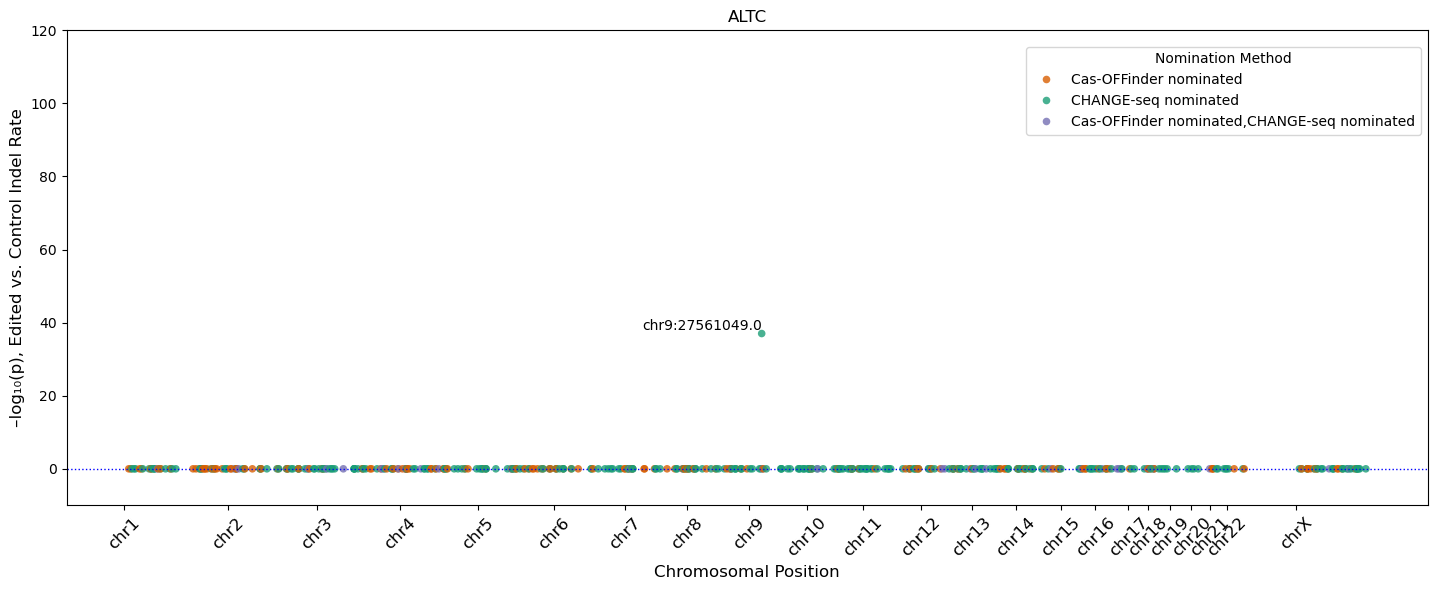

{'chr1': 248801752.0, 'chr2': 490804546.0, 'chr3': 686760447.0, 'chr4': 874133767.0, 'chr5': 1054517152.0, 'chr6': 1224651105.0, 'chr7': 1383489085.0, 'chr8': 1528528773.0, 'chr9': 1666232728.0, 'chr10': 1799760512.0, 'chr11': 1933043971.0, 'chr12': 2065827397.0, 'chr13': 2179952748.0, 'chr14': 2286823572.0, 'chr15': 2388680971.0, 'chr16': 2478497539.0, 'chr17': 2561647207.0, 'chr18': 2641626791.0, 'chr19': 2699699623.0, 'chr20': 2763830549.0, 'chr21': 2810252989.0, 'chr22': 2860974037.0, 'chrX': 3016436742.0}


,chrom,category,start,p-value,%edited difference,offset_start
15,chr1,"Cas-OFFinder nominated,CHANGE-seq nominated",994014.0,1.0,-0.001815,2.497958e+08
17,chr1,CHANGE-seq nominated,1022367.0,1.0,0.000000,2.498241e+08
21,chr1,CHANGE-seq nominated,1218324.0,1.0,0.000000,2.500201e+08
28,chr1,CHANGE-seq nominated,1476918.0,1.0,0.000000,2.502787e+08
56,chr1,CHANGE-seq nominated,2301518.0,1.0,-0.001692,2.511033e+08
...,...,...,...,...,...,...
3332,chrX,CHANGE-seq nominated,154022261.0,1.0,0.002079,3.170459e+09
3342,chrX,Cas-OFFinder nominated,154882248.0,1.0,0.000000,3.171319e+09
3344,chrX,"Cas-OFFinder nominated,CHANGE-seq nominated",155306644.0,1.0,-0.002088,3.171743e+09
3345,chrX,Cas-OFFinder nominated,155377985.0,1.0,0.000000,3.171815e+09


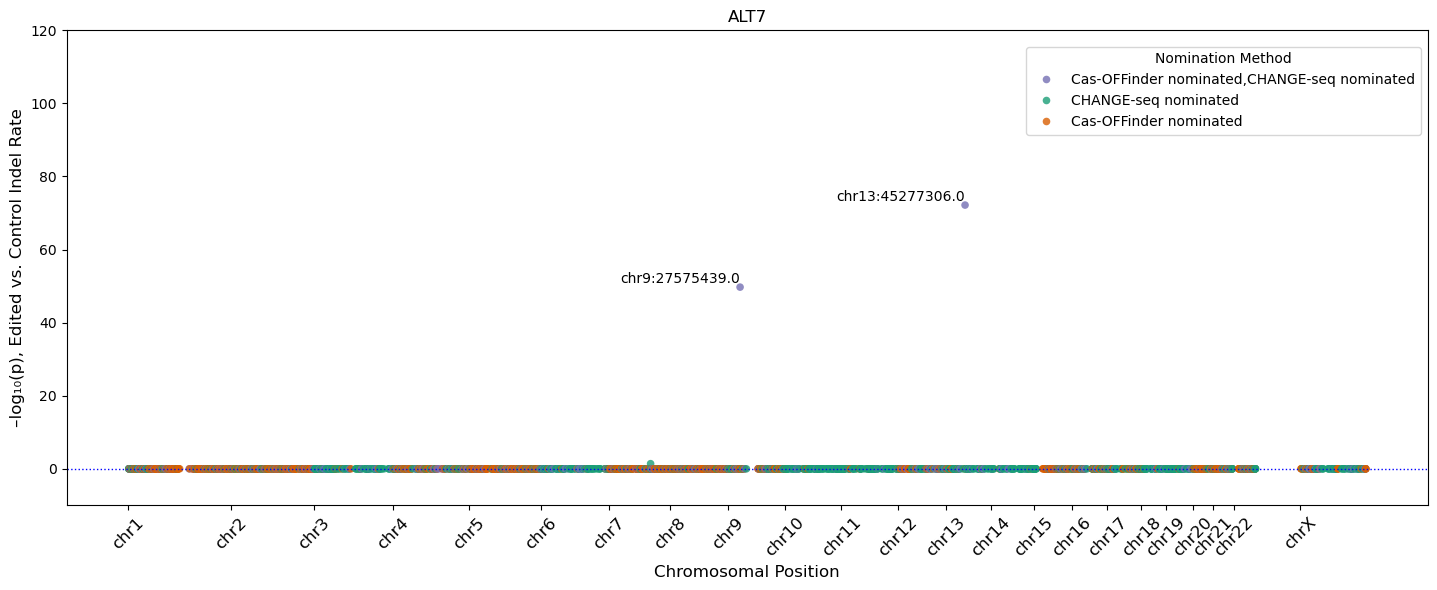

{'chr1': 248801752.0, 'chr2': 490804546.0, 'chr3': 686760447.0, 'chr4': 874133767.0, 'chr5': 1054517152.0, 'chr6': 1224651105.0, 'chr7': 1383489085.0, 'chr8': 1528528773.0, 'chr9': 1666232728.0, 'chr10': 1799760512.0, 'chr11': 1933043971.0, 'chr12': 2065827397.0, 'chr13': 2179952748.0, 'chr14': 2286823572.0, 'chr15': 2388680971.0, 'chr16': 2478497539.0, 'chr17': 2561647207.0, 'chr18': 2641626791.0, 'chr19': 2699699623.0, 'chr20': 2763830549.0, 'chr21': 2810252989.0, 'chr22': 2860974037.0, 'chrX': 3016436742.0}


,chrom,category,start,p-value,%edited difference,offset_start
15,chr1,"Cas-OFFinder nominated,CHANGE-seq nominated",994014.0,1.0,0.010843,2.497958e+08
17,chr1,CHANGE-seq nominated,1022367.0,1.0,0.000000,2.498241e+08
21,chr1,CHANGE-seq nominated,1218324.0,1.0,0.000000,2.500201e+08
28,chr1,CHANGE-seq nominated,1476918.0,1.0,0.000000,2.502787e+08
56,chr1,CHANGE-seq nominated,2301518.0,1.0,-0.001692,2.511033e+08
...,...,...,...,...,...,...
3332,chrX,CHANGE-seq nominated,154022261.0,1.0,0.000000,3.170459e+09
3342,chrX,Cas-OFFinder nominated,154882248.0,1.0,0.000000,3.171319e+09
3344,chrX,"Cas-OFFinder nominated,CHANGE-seq nominated",155306644.0,1.0,0.000463,3.171743e+09
3345,chrX,Cas-OFFinder nominated,155377985.0,1.0,0.000000,3.171815e+09


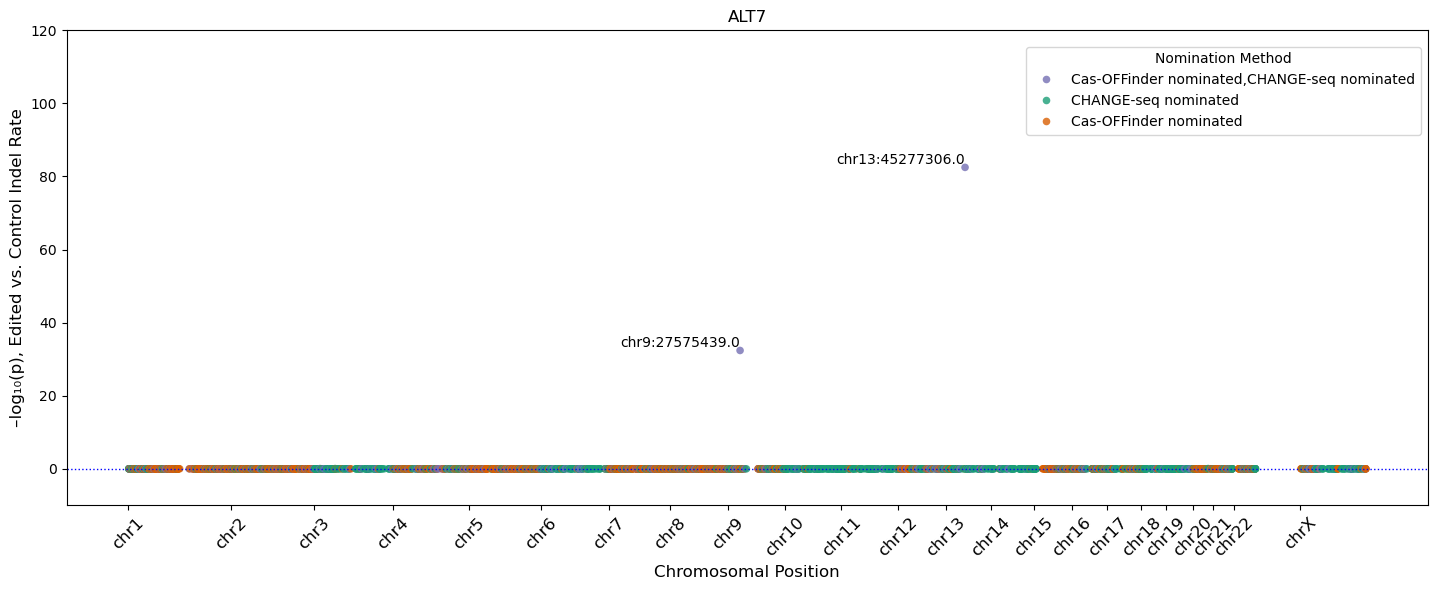

{'chr1': 246693253.0, 'chr2': 487174237.0, 'chr3': 676171579.0, 'chr4': 864895889.0, 'chr5': 1044203117.0, 'chr6': 1174101003.0, 'chr7': 1332184064.0, 'chr8': 1471700515.0, 'chr9': 1609432555.0, 'chr10': 1740884204.0, 'chr11': 1858017041.0, 'chr12': 1981818912.0, 'chr13': 2092575166.0, 'chr14': 2160361092.0, 'chr15': 2252574478.0, 'chr16': 2333774732.0, 'chr17': 2415811266.0, 'chr18': 2494593097.0, 'chr19': 2552872794.0, 'chr20': 2615646001.0, 'chr21': 2661218076.0, 'chr22': 2710286013.0, 'chrX': 2837281462.0}


,chrom,category,start,p-value,%edited difference,offset_start
6,chr1,CHANGE-seq nominated,2405292.0,1.0,0.000000,2.490985e+08
8,chr1,CHANGE-seq nominated,3037317.0,1.0,0.000000,2.497306e+08
11,chr1,CHANGE-seq nominated,3538825.0,1.0,0.000000,2.502321e+08
18,chr1,Cas-OFFinder nominated,6477585.0,1.0,0.000000,2.531708e+08
24,chr1,CHANGE-seq nominated,8527950.0,1.0,0.000000,2.552212e+08
...,...,...,...,...,...,...
166,chrX,Cas-OFFinder nominated,89872818.0,1.0,0.000000,2.927154e+09
179,chrX,CHANGE-seq nominated,104296778.0,1.0,-0.001965,2.941578e+09
185,chrX,Cas-OFFinder nominated,111221006.0,1.0,0.000000,2.948502e+09
186,chrX,CHANGE-seq nominated,111460469.0,1.0,0.000000,2.948742e+09


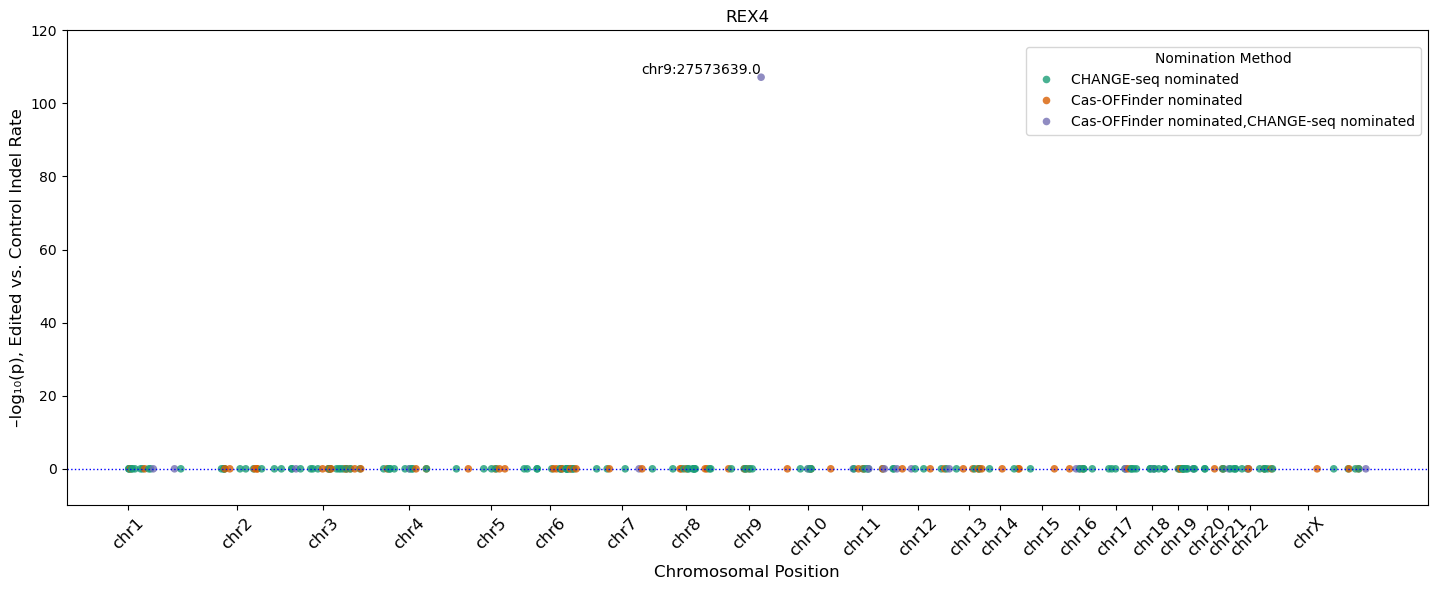

{'chr1': 246693253.0, 'chr2': 487174237.0, 'chr3': 676171579.0, 'chr4': 864895889.0, 'chr5': 1044203117.0, 'chr6': 1174101003.0, 'chr7': 1332184064.0, 'chr8': 1471700515.0, 'chr9': 1609432555.0, 'chr10': 1740884204.0, 'chr11': 1858017041.0, 'chr12': 1981818912.0, 'chr13': 2092575166.0, 'chr14': 2160361092.0, 'chr15': 2252574478.0, 'chr16': 2333774732.0, 'chr17': 2415811266.0, 'chr18': 2494593097.0, 'chr19': 2552872794.0, 'chr20': 2615646001.0, 'chr21': 2661218076.0, 'chr22': 2710286013.0, 'chrX': 2837281462.0}


,chrom,category,start,p-value,%edited difference,offset_start
6,chr1,CHANGE-seq nominated,2405292.0,1.0,0.000000,2.490985e+08
8,chr1,CHANGE-seq nominated,3037317.0,1.0,0.000000,2.497306e+08
11,chr1,CHANGE-seq nominated,3538825.0,1.0,0.000000,2.502321e+08
18,chr1,Cas-OFFinder nominated,6477585.0,1.0,0.000000,2.531708e+08
24,chr1,CHANGE-seq nominated,8527950.0,1.0,0.000000,2.552212e+08
...,...,...,...,...,...,...
166,chrX,Cas-OFFinder nominated,89872818.0,1.0,0.000000,2.927154e+09
179,chrX,CHANGE-seq nominated,104296778.0,1.0,0.001942,2.941578e+09
185,chrX,Cas-OFFinder nominated,111221006.0,1.0,0.000000,2.948502e+09
186,chrX,CHANGE-seq nominated,111460469.0,1.0,0.002037,2.948742e+09


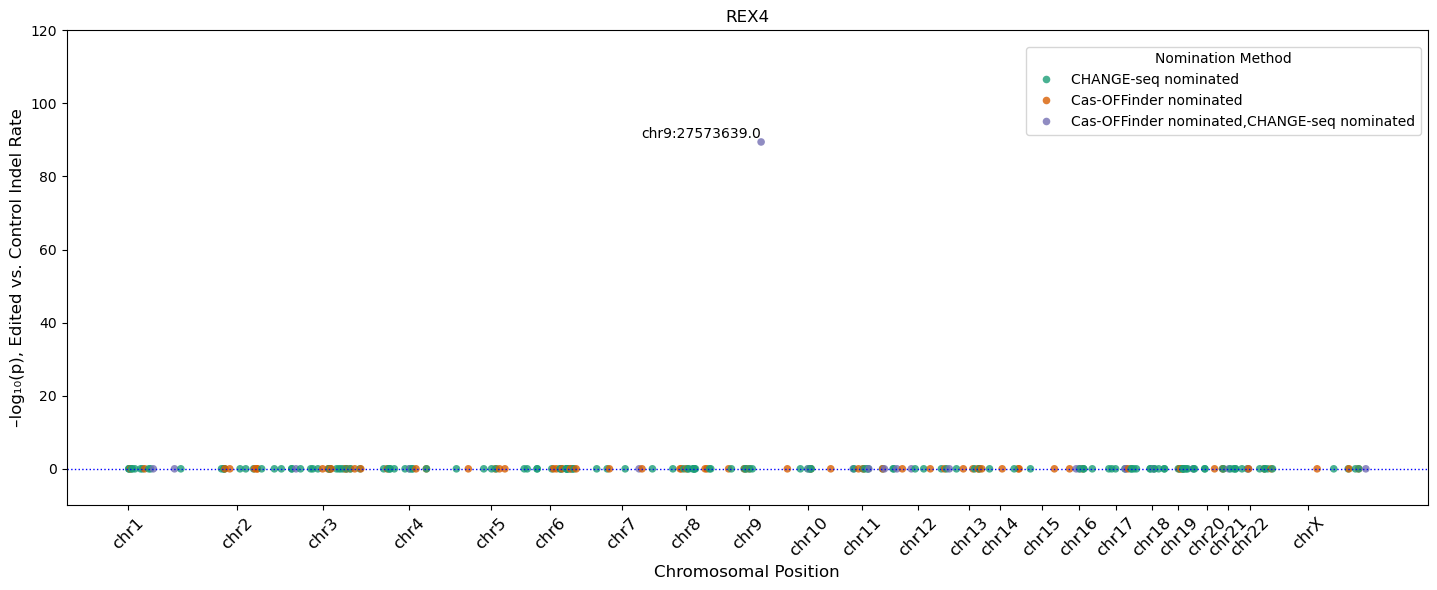

{'chr1': 248906754.0, 'chr2': 490465848.0, 'chr3': 687406070.0, 'chr4': 876695792.0, 'chr5': 1057368923.0, 'chr6': 1227629757.0, 'chr7': 1386486076.0, 'chr8': 1531339219.0, 'chr9': 1669423263.0, 'chr10': 1802731854.0, 'chr11': 1937460889.0, 'chr12': 2070498559.0, 'chr13': 2184696689.0, 'chr14': 2290163313.0, 'chr15': 2389896631.0, 'chr16': 2479944405.0, 'chr17': 2562559583.0, 'chr18': 2642524166.0, 'chr19': 2700772221.0, 'chr20': 2764855957.0, 'chr21': 2811267723.0, 'chr22': 2861999048.0, 'chrX': 3016485780.0}


,chrom,category,start,p-value,%edited difference,offset_start
65,chr1,CHANGE-seq nominated,1021277.0,1.0,0.001558,2.499280e+08
68,chr1,CHANGE-seq nominated,1045248.0,1.0,0.001664,2.499520e+08
71,chr1,"Cas-OFFinder nominated,CHANGE-seq nominated",1067711.0,1.0,-0.002014,2.499745e+08
74,chr1,CHANGE-seq nominated,1124435.0,1.0,0.000000,2.500312e+08
78,chr1,CHANGE-seq nominated,1185685.0,1.0,-0.002721,2.500924e+08
...,...,...,...,...,...,...
2511,chrX,CHANGE-seq nominated,152094438.0,1.0,0.002551,3.168580e+09
2515,chrX,"Cas-OFFinder nominated,CHANGE-seq nominated",153470571.0,1.0,-0.002387,3.169956e+09
2517,chrX,CHANGE-seq nominated,153737891.0,1.0,0.000000,3.170224e+09
2519,chrX,CHANGE-seq nominated,154032102.0,1.0,-0.003577,3.170518e+09


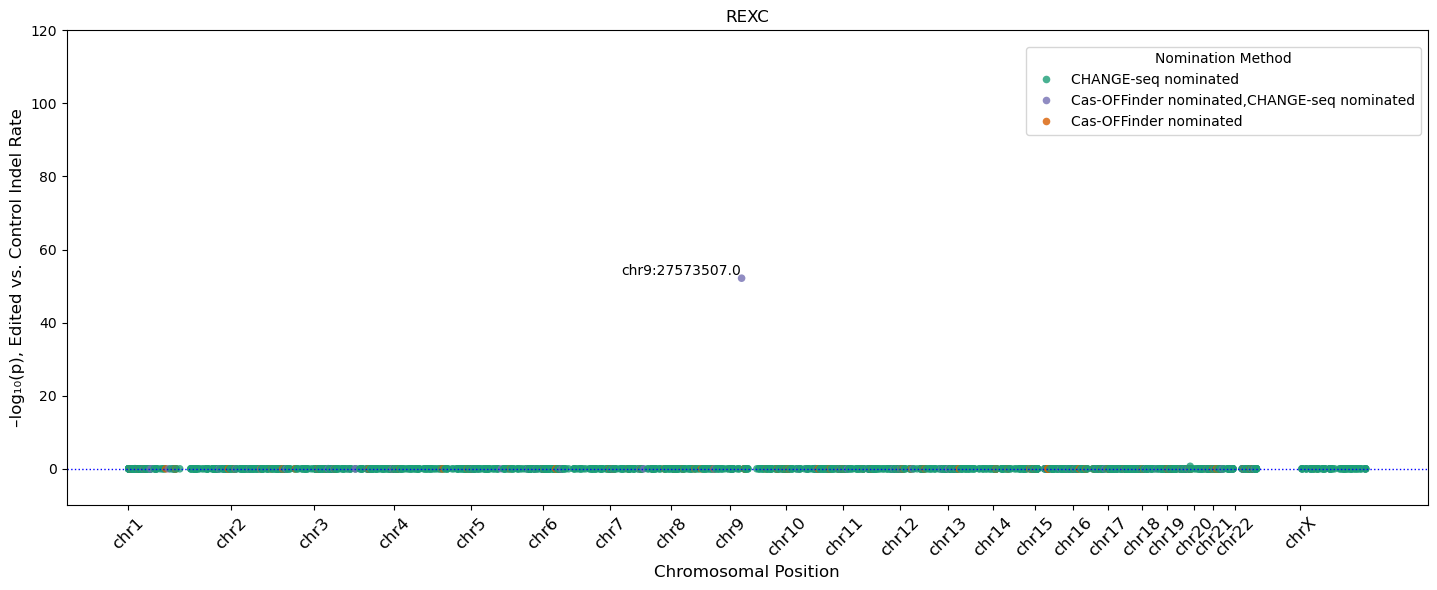

{'chr1': 248906754.0, 'chr2': 490465848.0, 'chr3': 687406070.0, 'chr4': 876695792.0, 'chr5': 1057368923.0, 'chr6': 1227629757.0, 'chr7': 1386486076.0, 'chr8': 1531339219.0, 'chr9': 1669423263.0, 'chr10': 1802731854.0, 'chr11': 1937460889.0, 'chr12': 2070498559.0, 'chr13': 2184696689.0, 'chr14': 2290163313.0, 'chr15': 2389896631.0, 'chr16': 2479944405.0, 'chr17': 2562559583.0, 'chr18': 2642524166.0, 'chr19': 2700772221.0, 'chr20': 2764855957.0, 'chr21': 2811267723.0, 'chr22': 2861999048.0, 'chrX': 3016485780.0}


,chrom,category,start,p-value,%edited difference,offset_start
65,chr1,CHANGE-seq nominated,1021277.0,1.0,0.001799,2.499280e+08
68,chr1,CHANGE-seq nominated,1045248.0,1.0,0.000000,2.499520e+08
71,chr1,"Cas-OFFinder nominated,CHANGE-seq nominated",1067711.0,1.0,-0.005906,2.499745e+08
74,chr1,CHANGE-seq nominated,1124435.0,1.0,0.000000,2.500312e+08
78,chr1,CHANGE-seq nominated,1185685.0,1.0,-0.004337,2.500924e+08
...,...,...,...,...,...,...
2511,chrX,CHANGE-seq nominated,152094438.0,1.0,0.004348,3.168580e+09
2515,chrX,"Cas-OFFinder nominated,CHANGE-seq nominated",153470571.0,1.0,-0.002387,3.169956e+09
2517,chrX,CHANGE-seq nominated,153737891.0,1.0,0.000000,3.170224e+09
2519,chrX,CHANGE-seq nominated,154032102.0,1.0,0.002708,3.170518e+09


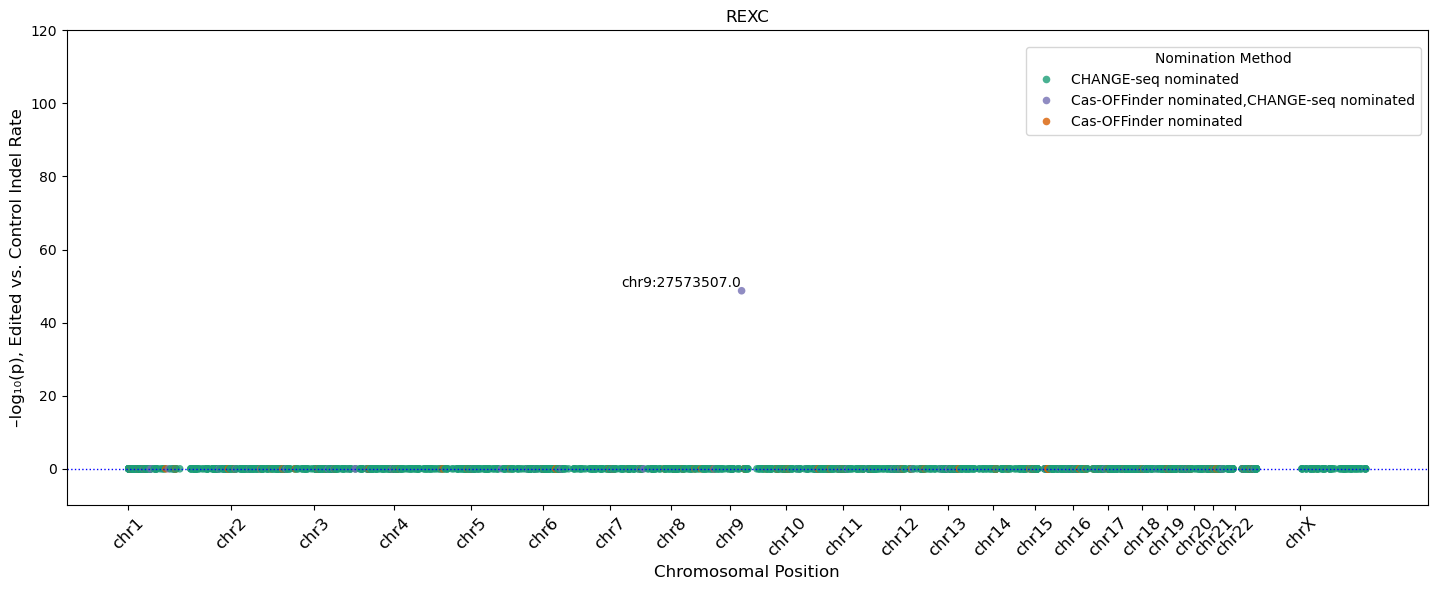

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Define alternating black-gray colors
black_gray = ['#000000', '#808080']  # Black and Gray

# # Generate dictionary with alternating colors
# chromosomes = [f'chr{i}' for i in range(1, 23)]
# custom_palette = {chrom: black_gray[i % 2] for i, chrom in enumerate(chromosomes)}
# custom_palette['chrX'] = '#000000'
# custom_palette['chrY'] = '#808080'
# #color based off location


#color based of  what its located in
category = ['CHANGE-seq nominated', 'Cas-OFFinder nominated,CHANGE-seq nominated', 'Cas-OFFinder nominated']
custom_palette = {'CHANGE-seq nominated': '#1b9e77',  'Cas-OFFinder nominated': '#d95f02', 'Cas-OFFinder nominated,CHANGE-seq nominated': '#7570b3'}

# Print to verify
print(custom_palette)


#need to modify to include the chromosome X and the chromsome Y
#make the y axis the adjusted p-value instead

for condition in all_tsvs:
    for replicate in np.arange(0, 2):
        
        
        # Create the data
        data = {
            'chrom': comp_dfs[condition][replicate]['chrom'],
            'category': comp_dfs[condition][replicate]['category'],
            'start': comp_dfs[condition][replicate]['start'],
            'p-value': comp_dfs[condition][replicate]['adjusted indel p-value']
        }

        
        df = pd.DataFrame(data)
        df['%edited difference'] = comp_dfs[condition][replicate]['edited indel %'] - comp_dfs[condition][replicate]['wt indel %']

        start_offset = []

        # Initialize the dictionary for offsets
        offsets = {}
        
        # Start by initializing the current position
        current_pos = 0
        
        # Iterate through each unique chromosome
        for chrom in df['chrom'].unique():
            # Get the data for the current chromosome
            chrom_data = df[df['chrom'] == chrom]
            
            # Find the maximum start position for the chromosome (end position)
            chrom_end = chrom_data['start'].max()  # Max position = end position for this chromosome
            
            # Store the offset (end position of the chromosome) in the dictionary
            offsets[chrom] = current_pos + chrom_end  # Offset is the cumulative position
            
            # Update the current position for the next chromosome
            current_pos += chrom_end  # Add the current chromosome's end position to the cumulative position
        
        # Print the offsets dictionary to see the results
        print(offsets)
        
        df['offset_start'] = df.apply(lambda row: row['start'] + offsets[row['chrom']], axis=1)
        display(df)

 
        # Transform p-values to -log10(p-value)
        df['-log10 p-value'] = -np.log10(df['p-value'])

        
        # Plot the Manhattan plot
        plt.figure(figsize=(15, 6))
        
        # Create scatter plot and remove edgecolor (no outline for dots)
        sns.scatterplot(data=df, x="offset_start", y="-log10 p-value", hue="category", palette=custom_palette, alpha=0.8, edgecolor='none', s = 30)
            
        # Label the plot
        plt.xlabel("Chromosomal Position", fontsize=12)
        plt.ylabel("–log₁₀(p), Edited vs. Control Indel Rate", fontsize=12)
        plt.title(condition, fontsize=12)
        
        # Customize the X-axis to display chromosomes properly (and adjust spacing if needed)
        chrom_boundaries = []
        chrom_labels = []
        
        # Track the cumulative position for each chromosome
        current_pos = 0
        for chrom in df['chrom'].unique():
            chrom_data = df[df['chrom'] == chrom]
            chrom_end = chrom_data['start'].max()  # Get the max position for the chromosome
            chrom_boundaries.append(chrom_end + current_pos)  # Add the offset
            chrom_labels.append(chrom)  # Add the chrom label
            current_pos += chrom_end  # Update current position

        
        significant_df = df[df['p-value'] < 0.001]

        # Label significant points
        for _, row in significant_df.iterrows():
            plt.text(row['offset_start'] - 2, row['-log10 p-value'] + 1, 
                     f"{row['chrom']}:{row['start']}", fontsize=10, ha='right', color='black')
        
        # Set custom x-ticks based on chromosome boundaries
        plt.xticks(ticks=chrom_boundaries, labels=chrom_labels, rotation=45,fontsize=12)
        
        # Add a horizontal line to indicate the significance threshold (optional)
        # threshold = -np.log10(5e-8)
        # plt.axhline(y=threshold, color='red', linestyle='--', label="Significance Threshold")
        
        # Add a legend to indicate the chromosomes
        plt.legend(title="Nomination Method", bbox_to_anchor=(0.70, 0.98), loc='upper left')
        plt.ylim(-10,120)
            
        # Show the plot
        plt.axhline(y=0.05, color='blue', linestyle=':', linewidth=1)
        plt.tight_layout()
        plt.show()
